In [1]:
import torch
import circuits as ckt
from circuits import Element,Kinds
from models import Solver
from models import State
from data import Input,Process

In [2]:
# Get cpu or gpu device for training.
# device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cpu"
print(f"Using {device} device")

# torch.autograd.set_detect_anomaly(True)
torch.set_printoptions(precision=2, linewidth=200)

Using cpu device


# Generate Input Data for a Simple Circuit
Circuit is an independent voltage source and a resistor.

In [3]:
vr = ckt.ring(Kinds.IVS,Kinds.R,4)
vr.elements[0].attr = 10
vr.elements[-1].v = 4
vr

Circuit with 5 nodes and 5 elements

In [4]:
vr.elements

[(IVS, 4, 0), (R, 1, 0), (R, 2, 1), (R, 3, 2), (R, 4, 3)]

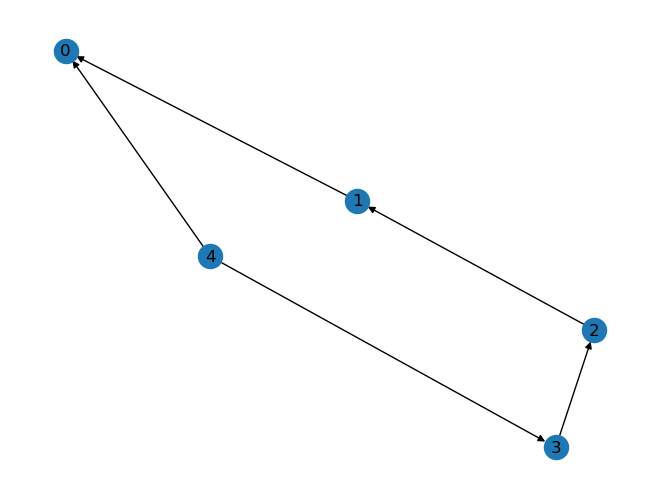

In [5]:
vr.draw()

In [6]:
input = Input(vr)

c:\Users\terry\OneDrive\Documents\GitHub\side_circuit\ml\circuits.py:73: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  M_scipy = nx.incidence_matrix(G=self.nx_graph(),oriented=True)


In [7]:
model = Solver(input=input,attr=input.attr_param, state=State.Solve)
model.attr

Parameter containing:
tensor([[10.00],
        [ 0.48],
        [ 0.19],
        [ 0.88],
        [ 0.33]], requires_grad=True)

In [8]:
X = model()
X

tensor([[-5.34],
        [ 5.34],
        [ 5.34],
        [ 5.34],
        [ 5.34],
        [10.00],
        [ 2.55],
        [ 0.99],
        [ 4.70],
        [ 1.76],
        [-2.55],
        [ 7.45],
        [ 6.46],
        [ 1.76]], grad_fn=<LinalgSolveExBackward0>)

In [9]:
input.ivp_inputs()

tensor([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [10.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 4.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.]])

In [10]:
input.ivp_knowns_mask()

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [16]:
input.circuit.A_edge(False)

tensor([[0, 1, 0, 0, 1],
        [1, 0, 1, 0, 0],
        [0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1],
        [1, 0, 0, 1, 0]])

In [12]:
process = Process(input)

In [13]:
errors = process.errors(X)
errors

tensor([[0.00],
        [0.00],
        [0.00],
        [0.00],
        [0.00],
        [0.00],
        [0.00],
        [0.00],
        [0.00],
        [2.24],
        [0.00],
        [0.00],
        [0.00],
        [0.00]], grad_fn=<IndexPutBackward0>)

In [14]:
process.diffuse(X)

tensor([[0., 0., 0., 0., 0.]], grad_fn=<MmBackward0>)